* Build the linear regression model using scikit learn in boston data to predict'Price' based on other dependent variable.
* Here is the code to load the data:
    * import numpy as np
    * import pandas as pd
    * import scipy.stats as stats
    * import matplotlib.pyplot as plt
    * import sklearn
    * from sklearn.datasets import load_boston
    * boston = load_boston()
    * bos = pd.DataFrame(boston.data)

In [89]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

import seaborn as sns

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [10]:
features = pd.DataFrame(boston.data,columns = boston.feature_names)

In [17]:
target = pd.DataFrame(boston.target,columns = ['target'])

In [125]:
df = pd.concat([features,target],axis = 1)

In [20]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [42]:
df['CHAS'] = df['CHAS'].astype(int)

In [43]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [48]:
df['CHAS'] = pd.get_dummies(df['CHAS'],drop_first=True)

In [49]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [66]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [67]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [68]:
y_pred = reg.predict(X_test)

In [100]:
model = smf.ols(formula='target ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT',data = df).fit()

In [101]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 22 Nov 2020   Prob (F-statistic):          6.72e-135
Time:                        23:42:06   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [78]:
corr = df.corr()

<AxesSubplot:>

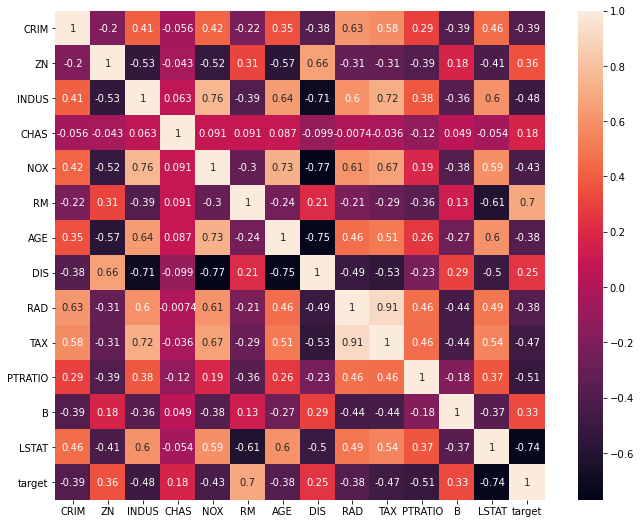

In [103]:
# plotting heat map for correlation matrix
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr,vmax=1, square=True, annot=True,)

we can see that there are some correlation between the features

In [106]:
# The following predictors have P-values < 0.05 which suggests we can reject 
# the null hypothesis that they have no relationship with the response:
significant_features = model.pvalues[model.pvalues < 0.05].sort_values()
significant_features

LSTAT        7.776912e-23
RM           1.979441e-18
DIS          6.013491e-13
PTRATIO      1.308835e-12
Intercept    3.283438e-12
NOX          4.245644e-06
RAD          5.070529e-06
B            5.728592e-04
ZN           7.781097e-04
CRIM         1.086810e-03
TAX          1.111637e-03
CHAS         1.925030e-03
dtype: float64

In [126]:
model2 = smf.ols(formula='target ~ CRIM + LSTAT + RM + NOX + DIS + RAD + TAX + PTRATIO + B + CHAS + ZN',data = df).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Mon, 23 Nov 2020   Prob (F-statistic):          5.54e-137
Time:                        00:18:57   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.0

#### feature selection

In [108]:
# find and remove the correlated features
def correlation(dataset,threshold):
    col_corr = set()  # set of all names of correlated features/columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs( corr_matrix.iloc[i ,j] ) > threshold:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]    # getting the name of columns
                col_corr.add(colname)
    return col_corr

In [140]:
threshold=0.8

In [141]:
correlation(df.iloc[:,:-1],threshold)

{'TAX'}

In [143]:
model = smf.ols(formula='target ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + PTRATIO + B + LSTAT',data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     113.9
Date:                Mon, 23 Nov 2020   Prob (F-statistic):          1.21e-133
Time:                        00:24:33   Log-Likelihood:                -1504.3
No. Observations:                 506   AIC:                             3035.
Df Residuals:                     493   BIC:                             3089.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.6286      5.123      6.760      0.0

so our model is showing approximatly 73.5 percent accuracy